<a href="https://colab.research.google.com/github/joseivangeraldo/TCC_Univesp/blob/main/BigDatatcc20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos/2021-09-05/esus-vepi.LeitoOcupacao.csv ')
df = pd.read_csv('https://ass3-sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos/2021-10-09/esus-vepi.LeitoOcupacao.csv ', low_memory=False)
df

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,p5Ez41Zu6B,2020-04-14T03:00:00.000Z,2303167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15T13:44:30.085Z,2020-04-16T13:56:13.656Z
1,eUOMsSt7T7,2020-04-15T03:00:00.000Z,5935377\t,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15T13:50:47.256Z,2020-08-01T20:08:13.116Z
2,QaG4oIBrMa,2020-04-15T14:57:16.255Z,0012599,15.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15T15:20:57.033Z,2020-08-01T20:02:12.729Z
3,ifya31F3ZF,2020-03-24T03:00:00.000Z,2562871,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15T16:58:32.839Z,2020-08-01T21:40:37.624Z
4,dkurDhelx9,2020-04-01T03:00:00.000Z,2252228,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15T17:02:53.877Z,2020-08-01T21:37:53.664Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163317,WAFMHjII7Q,2021-10-09T03:00:25.966Z,2135124,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,parse-cloud,_User$Uc8jifsZ5q,Minas Gerais,Capelinha,Minas Gerais,Capelinha,False,False,2021-10-10T00:30:48.635Z,2021-10-10T00:30:48.635Z
1163318,b68SRIppUO,2021-10-09T03:00:38.885Z,0010480,NaN,NaN,NaN,NaN,0.0,0.0,1.0,3.0,parse-cloud,_User$zCazvV4Suj,Distrito Federal,Brasília,Distrito Federal,Brasília,False,False,2021-10-10T00:34:37.843Z,2021-10-10T00:34:37.843Z
1163319,DOmk91yDJX,2021-10-09T04:00:21.502Z,2493853,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,parse-cloud,_User$l9Ty7wIKBU,Rondônia,Porto Velho,Rondônia,Porto Velho,False,False,2021-10-10T00:55:42.858Z,2021-10-10T00:55:42.858Z
1163320,9nuHDFS2qv,2021-10-09T03:00:38.948Z,7753470,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,parse-cloud,_User$zpEkM69unt,Alagoas,União dos Palmares,Alagoas,União dos Palmares,False,False,2021-10-10T00:59:17.897Z,2021-10-10T00:59:17.897Z


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163322 entries, 0 to 1163321
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   _id                    1163322 non-null  object 
 1   dataNotificacao        1163316 non-null  object 
 2   cnes                   1163272 non-null  object 
 3   ocupacaoSuspeitoCli    1015081 non-null  float64
 4   ocupacaoSuspeitoUti    1015081 non-null  float64
 5   ocupacaoConfirmadoCli  1015082 non-null  float64
 6   ocupacaoConfirmadoUti  1015082 non-null  float64
 7   saidaSuspeitaObitos    1163200 non-null  float64
 8   saidaSuspeitaAltas     1163212 non-null  float64
 9   saidaConfirmadaObitos  1163304 non-null  float64
 10  saidaConfirmadaAltas   1163303 non-null  float64
 11  origem                 1163322 non-null  object 
 12  _p_usuario             1163322 non-null  object 
 13  estadoNotificacao      1163322 non-null  object 
 14  municipioNotificac

Vamos começar tratando os nosssos dados.
Como notado na celula anterior , oque for Object pode ser considerado com uma sequencia de Strings.Temos então de alterar as colunas que estão com conflito entre as variaveis.Por exemplo data não pode ser considerada Object.Vamos alterar isto Abaixo.





In [ ]:
# Convertendo as colunas que tem datas para o formato apropriado
##Abaixo foi retirado integralmente do manual do Pandas :
##https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas-to-datetime
df['dataNotificacao'] = pd.to_datetime( df['dataNotificacao'],errors='coerce', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
df['_created_at'] = pd.to_datetime( df['_created_at'],errors='coerce', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
df['_updated_at'] = pd.to_datetime( df['_updated_at'],errors='coerce', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)


In [ ]:
###Agora na informação do DataFrame as colunas aparecem com o formato data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163322 entries, 0 to 1163321
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   _id                    1163322 non-null  object             
 1   dataNotificacao        1163315 non-null  datetime64[ns, UTC]
 2   cnes                   1163272 non-null  object             
 3   ocupacaoSuspeitoCli    1015081 non-null  float64            
 4   ocupacaoSuspeitoUti    1015081 non-null  float64            
 5   ocupacaoConfirmadoCli  1015082 non-null  float64            
 6   ocupacaoConfirmadoUti  1015082 non-null  float64            
 7   saidaSuspeitaObitos    1163200 non-null  float64            
 8   saidaSuspeitaAltas     1163212 non-null  float64            
 9   saidaConfirmadaObitos  1163304 non-null  float64            
 10  saidaConfirmadaAltas   1163303 non-null  float64            
 11  origem                 1

In [ ]:
df

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,p5Ez41Zu6B,2020-04-14 03:00:00+00:00,2303167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15 13:44:30.085000+00:00,2020-04-16 13:56:13.656000+00:00
1,eUOMsSt7T7,2020-04-15 03:00:00+00:00,5935377\t,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15 13:50:47.256000+00:00,2020-08-01 20:08:13.116000+00:00
2,QaG4oIBrMa,2020-04-15 14:57:16.255000+00:00,0012599,15.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15 15:20:57.033000+00:00,2020-08-01 20:02:12.729000+00:00
3,ifya31F3ZF,2020-03-24 03:00:00+00:00,2562871,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15 16:58:32.839000+00:00,2020-08-01 21:40:37.624000+00:00
4,dkurDhelx9,2020-04-01 03:00:00+00:00,2252228,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15 17:02:53.877000+00:00,2020-08-01 21:37:53.664000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163317,WAFMHjII7Q,2021-10-09 03:00:25.966000+00:00,2135124,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,parse-cloud,_User$Uc8jifsZ5q,Minas Gerais,Capelinha,Minas Gerais,Capelinha,False,False,2021-10-10 00:30:48.635000+00:00,2021-10-10 00:30:48.635000+00:00
1163318,b68SRIppUO,2021-10-09 03:00:38.885000+00:00,0010480,NaN,NaN,NaN,NaN,0.0,0.0,1.0,3.0,parse-cloud,_User$zCazvV4Suj,Distrito Federal,Brasília,Distrito Federal,Brasília,False,False,2021-10-10 00:34:37.843000+00:00,2021-10-10 00:34:37.843000+00:00
1163319,DOmk91yDJX,2021-10-09 04:00:21.502000+00:00,2493853,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,parse-cloud,_User$l9Ty7wIKBU,Rondônia,Porto Velho,Rondônia,Porto Velho,False,False,2021-10-10 00:55:42.858000+00:00,2021-10-10 00:55:42.858000+00:00
1163320,9nuHDFS2qv,2021-10-09 03:00:38.948000+00:00,7753470,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,parse-cloud,_User$zpEkM69unt,Alagoas,União dos Palmares,Alagoas,União dos Palmares,False,False,2021-10-10 00:59:17.897000+00:00,2021-10-10 00:59:17.897000+00:00


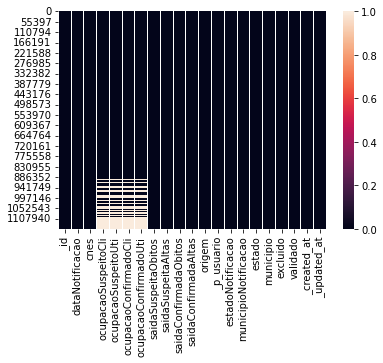

In [ ]:
sns.heatmap(df.isnull());

In [ ]:
###agora vamos emover as linhas que tem itens vazios
df = df.dropna()
df ###exibimos só para verificar

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,p5Ez41Zu6B,2020-04-14 03:00:00+00:00,2303167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15 13:44:30.085000+00:00,2020-04-16 13:56:13.656000+00:00
1,eUOMsSt7T7,2020-04-15 03:00:00+00:00,5935377\t,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15 13:50:47.256000+00:00,2020-08-01 20:08:13.116000+00:00
2,QaG4oIBrMa,2020-04-15 14:57:16.255000+00:00,0012599,15.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15 15:20:57.033000+00:00,2020-08-01 20:02:12.729000+00:00
3,ifya31F3ZF,2020-03-24 03:00:00+00:00,2562871,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15 16:58:32.839000+00:00,2020-08-01 21:40:37.624000+00:00
4,dkurDhelx9,2020-04-01 03:00:00+00:00,2252228,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15 17:02:53.877000+00:00,2020-08-01 21:37:53.664000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110895,NfIT03COMp,2021-09-13 03:00:27.430000+00:00,2079127,292.0,42.0,24.0,16.0,0.0,2.0,0.0,5.0,parse-cloud,_User$8jmkhY2Prv,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2021-09-13 13:45:57.425000+00:00,2021-09-13 13:45:57.425000+00:00
1111411,Tf2RGwRe4v,2021-09-13 03:00:11.672000+00:00,2208156,77.0,10.0,9.0,1.0,0.0,1.0,0.0,3.0,parse-cloud,_User$8TyVW9gLWJ,Minas Gerais,Juiz de Fora,Minas Gerais,Juiz de Fora,False,False,2021-09-13 16:50:01.637000+00:00,2021-09-13 16:50:01.637000+00:00
1111505,hmMq4RY8ey,2021-09-13 03:00:19.827000+00:00,2543044,35.0,8.0,2.0,1.0,0.0,0.0,1.0,6.0,parse-cloud,_User$ilqd8RdRh8,Santa Catarina,Porto União,Santa Catarina,Porto União,False,False,2021-09-13 17:29:06.383000+00:00,2021-09-13 17:29:06.383000+00:00
1113392,uU1NszEdGM,2021-09-14 03:00:00.793000+00:00,2201542,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,parse-cloud,_User$yAJHOgaJ87,Minas Gerais,Iturama,Minas Gerais,Iturama,False,False,2021-09-14 13:07:46.247000+00:00,2021-09-14 13:07:46.247000+00:00


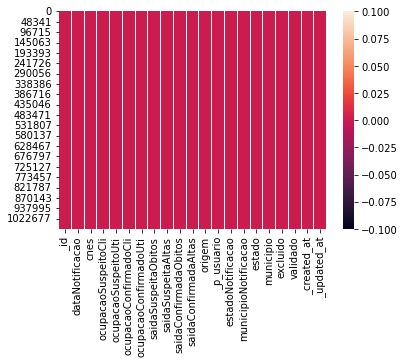

In [ ]:
sns.heatmap(df.isnull());

A primeira análise que iremos realizar é de
caráter exploratório. Entender valores totais de campos da nossa base de dados.
Para isso, usaremos a coluna 'ocupacaoConfirmadoUti' do nosso
dataframe. Para isso, usaremos o método do pandas:
.value_counts() [Consulte documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
##Pegar dados que queremos dar uma ampliada ,como se fosse uma lente de aumento
display(df['ocupacaoConfirmadoUti'].value_counts())
###Na saida resultou 

0.00      554726
1.00       36237
2.00       31080
5.00       29629
3.00       29262
           ...  
43.60          1
263.00         1
65.50          1
55.54          1
61.50          1
Name: ocupacaoConfirmadoUti, Length: 505, dtype: int64

df['ocupacaoConfirmadoUti'] -> é a base de tudo, coluna do DtaFrame que será analisada. 

.Value_counts(normalize=True) -> Da coluna escolhida, conta os dados em um formato normalizado.

.map('{:.1%}'.format) -> Essa etapa se utiliza dos valores calculados na etapa anterior e formata para um padrão. 

In [ ]:
display(df['ocupacaoConfirmadoUti'].value_counts(normalize=True).map('{:.1%}'.format))

0.00      54.7%
1.00       3.6%
2.00       3.1%
5.00       2.9%
3.00       2.9%
          ...  
43.60      0.0%
263.00     0.0%
65.50      0.0%
55.54      0.0%
61.50      0.0%
Name: ocupacaoConfirmadoUti, Length: 505, dtype: object

In [ ]:
###vamos trabalhar com esta amostra
novo_df = df.loc[ (df['saidaConfirmadaObitos'] > 1) | (df['saidaSuspeitaObitos'] > 1) & (df['ocupacaoConfirmadoUti'] > 15.0) ] 
novo_df  ##só para imprimir novo dataframe


,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
672,LzsYNVuf8F,2020-04-04 03:00:00+00:00,2080273,78.0,53.0,20.0,26.0,0.0,0.0,2.0,1.0,parse-cloud,_User$TIxeFDVMHM,São Paulo,Santo André,São Paulo,Santo André,False,False,2020-04-16 15:26:51.231000+00:00,2020-08-01 21:18:08.868000+00:00
674,KsCGJ3uyUj,2020-04-05 03:00:00+00:00,2080273,77.0,51.0,17.0,26.0,0.0,0.0,2.0,0.0,parse-cloud,_User$TIxeFDVMHM,São Paulo,Santo André,São Paulo,Santo André,False,False,2020-04-16 15:28:51.596000+00:00,2020-08-01 21:12:33.181000+00:00
1111,10FOLQ4qkQ,2020-04-01 03:00:00+00:00,5718368,56.0,27.0,29.0,10.0,0.0,0.0,3.0,10.0,parse-cloud,_User$s29ZZP8pWB,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2020-04-16 21:11:37.151000+00:00,2020-08-01 21:36:53.695000+00:00
1115,JROM0Rrsnf,2020-04-05 03:00:00+00:00,5718368,42.0,21.0,25.0,9.0,0.0,0.0,2.0,9.0,parse-cloud,_User$s29ZZP8pWB,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2020-04-16 21:13:44.432000+00:00,2020-08-01 21:12:00.195000+00:00
1118,UdPRwDEyuJ,2020-04-08 03:00:00+00:00,5718368,59.0,23.0,32.0,15.0,0.0,0.0,2.0,6.0,parse-cloud,_User$s29ZZP8pWB,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2020-04-16 21:14:56.837000+00:00,2020-08-01 20:51:40.936000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109003,cxh5MuabZ2,2021-09-12 03:00:51.285000+00:00,3126838,144.0,42.0,3.0,7.0,1.0,0.0,3.0,0.0,parse-cloud,_User$dOjfWEaLAD,São Paulo,Taubaté,São Paulo,Taubaté,False,False,2021-09-12 12:44:25.376000+00:00,2021-09-12 12:44:25.376000+00:00
1109008,howAMrSfxC,2021-09-12 03:00:43.777000+00:00,2122677,27.0,6.0,5.0,6.0,0.0,0.0,3.0,0.0,parse-cloud,_User$iW8SNStegT,Minas Gerais,Além Paraíba,Minas Gerais,Além Paraíba,False,False,2021-09-12 12:46:59.447000+00:00,2021-09-12 12:46:59.447000+00:00
1109107,ZRaLH2Gjpn,2021-09-12 03:00:01.865000+00:00,2089602,115.0,67.0,14.0,10.0,1.0,0.0,2.0,0.0,parse-cloud,_User$eImqslIqBC,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2021-09-12 15:17:47.240000+00:00,2021-09-12 15:17:47.240000+00:00
1109188,bdmMgQgSwP,2021-09-12 03:00:00+00:00,2537788,144.0,25.0,12.0,54.0,0.0,0.0,4.0,2.0,parse-cloud,_User$oI8mB8Tilf,Santa Catarina,Chapecó,Santa Catarina,Chapecó,False,False,2021-09-12 18:30:37.723000+00:00,2021-09-13 21:11:50.450000+00:00


Um dos caminhos mais comuns é fazer uma análise gráfica.
Temos um total de 20 colunas, cada uma delas nos
fornece uma informação distinta.
Vamos fazer através de codigo python para agilizar
***Vamos importar mais uma biblioteca: plotly.express***

In [ ]:
import plotly.express as px  ###está é a biblioteca que trabalha com graficos mais eficientemente


In [ ]:
px.scatter(novo_df , x ='dataNotificacao' ,  y='ocupacaoConfirmadoUti' )

In [ ]:
###ORGANIZEI POR DATA DE NOTIFICAÇÃO PORQUE FOI ENCONTARDO REGISTROS ANTIGOS NO DATAFRAME
###comprovei que é isto mesmo
novo_df = novo_df.sort_values(by='dataNotificacao')
novo_df

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
995641,RI8FNDG4z3,1977-07-09 03:00:00+00:00,2386569,7.0,7.0,7.0,7.0,2.0,5.0,2.0,5.0,parse-cloud,_User$3FlCUlXwHF,Bahia,Brumado,Bahia,Brumado,False,False,2021-07-16 15:13:56.951000+00:00,2021-07-16 15:13:56.951000+00:00
825357,ZebMy6lgCr,1982-04-28 03:00:00+00:00,2287250,51.0,28.0,49.0,23.0,1.0,1.0,2.0,3.0,parse-cloud,_User$wEWek9urCS,Rio de Janeiro,Campos dos Goytacazes,Rio de Janeiro,Campos dos Goytacazes,False,False,2021-04-30 17:36:04.379000+00:00,2021-04-30 17:36:04.379000+00:00
803136,PCXVw3WPM9,1985-04-22 03:00:00+00:00,6595197,88.0,85.0,88.0,91.0,0.0,0.0,2.0,2.0,parse-cloud,_User$iv5l7OeBqQ,Bahia,Salvador,Bahia,Salvador,False,False,2021-04-22 15:29:40.045000+00:00,2021-04-22 18:19:37.483000+00:00
993109,FEvkNtjqU5,2001-07-10 03:00:00+00:00,0013846,314.0,195.0,121.0,195.0,0.0,0.0,4.0,20.0,parse-cloud,_User$PtPnlbdEeC,Paraná,Campo Largo,Paraná,Campo Largo,False,False,2021-07-15 12:17:20.724000+00:00,2021-07-15 12:17:20.724000+00:00
850002,lpv21ZW7hE,2003-04-27 03:00:00+00:00,0106526,0.0,0.0,74.0,119.0,5.0,0.0,3.0,1.0,parse-cloud,_User$wvtpRFWWyy,Bahia,Salvador,Bahia,Salvador,False,False,2021-05-10 14:26:44.082000+00:00,2021-05-10 14:26:44.082000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109008,howAMrSfxC,2021-09-12 03:00:43.777000+00:00,2122677,27.0,6.0,5.0,6.0,0.0,0.0,3.0,0.0,parse-cloud,_User$iW8SNStegT,Minas Gerais,Além Paraíba,Minas Gerais,Além Paraíba,False,False,2021-09-12 12:46:59.447000+00:00,2021-09-12 12:46:59.447000+00:00
1108884,KCYyl5QZ0d,2021-09-12 03:00:50.286000+00:00,0678627,11.0,4.0,11.0,4.0,2.0,0.0,2.0,0.0,parse-cloud,_User$nOpco0VzoI,Espírito Santo,Linhares,Espírito Santo,Linhares,False,False,2021-09-12 10:49:00.755000+00:00,2021-09-12 10:49:00.755000+00:00
1108890,iGSun9egIB,2021-09-12 03:00:51.256000+00:00,2139049,18.0,0.0,0.0,0.0,45.0,71.0,37.0,151.0,parse-cloud,_User$vtQYMRgZu8,Minas Gerais,Pedra Azul,Minas Gerais,Pedra Azul,False,False,2021-09-12 10:55:41.987000+00:00,2021-09-12 10:55:41.987000+00:00
1109003,cxh5MuabZ2,2021-09-12 03:00:51.285000+00:00,3126838,144.0,42.0,3.0,7.0,1.0,0.0,3.0,0.0,parse-cloud,_User$dOjfWEaLAD,São Paulo,Taubaté,São Paulo,Taubaté,False,False,2021-09-12 12:44:25.376000+00:00,2021-09-12 12:44:25.376000+00:00


In [ ]:
##colocando a busca somente no periodo que é descrito na base de dados oficiais
selecao = (novo_df['dataNotificacao'] >= '2021-03-03') & (novo_df['dataNotificacao'] <= '2021-09-10')
df_filtrado = novo_df[selecao]
df_filtrado

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
681193,C5SMryDSnw,2021-03-03 00:00:00+00:00,2078015,0.0,0.0,172.0,131.0,6.0,20.0,3.0,6.0,RPA-SP,_User$HzwsO90KQW,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2021-03-04 08:22:22.413000+00:00,2021-03-04 08:22:22.413000+00:00
681096,IOKZQGMBUE,2021-03-03 00:00:00+00:00,2798298,0.0,0.0,42.0,48.0,0.0,0.0,3.0,6.0,RPA-SP,_User$HzwsO90KQW,São Paulo,São José do Rio Preto,São Paulo,São José do Rio Preto,False,False,2021-03-04 08:22:10.325000+00:00,2021-03-04 08:22:10.325000+00:00
679056,3Js5X0FvO1,2021-03-03 00:00:00+00:00,2075962,0.0,0.0,29.0,13.0,2.0,0.0,2.0,0.0,RPA-SP,_User$HzwsO90KQW,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2021-03-03 11:27:41.145000+00:00,2021-03-04 08:22:23.351000+00:00
680871,lqkmTdLXVY,2021-03-03 00:00:00+00:00,0008923,0.0,0.0,18.0,80.0,0.0,1.0,7.0,3.0,RPA-SP,_User$HzwsO90KQW,São Paulo,Santo André,São Paulo,Santo André,False,False,2021-03-04 08:21:46.468000+00:00,2021-03-04 08:21:46.468000+00:00
680877,EeXlRLv9YC,2021-03-03 00:00:00+00:00,2825260,0.0,0.0,21.0,7.0,0.0,3.0,2.0,0.0,RPA-SP,_User$HzwsO90KQW,São Paulo,Sumaré,São Paulo,Sumaré,False,False,2021-03-04 08:21:47.120000+00:00,2021-03-04 08:21:47.120000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103185,FYeOhkUyCA,2021-09-09 03:00:45.843000+00:00,0105805,20.0,75.0,20.0,75.0,0.0,0.0,12.0,5.0,parse-cloud,_User$1rKJCXsVgF,Rio de Janeiro,Duque de Caxias,Rio de Janeiro,Duque de Caxias,False,False,2021-09-09 10:25:05.546000+00:00,2021-09-09 10:25:05.546000+00:00
1104184,KqCUYo8RJU,2021-09-09 03:00:45.995000+00:00,9074457,17.0,24.0,17.0,24.0,0.0,0.0,2.0,8.0,parse-cloud,_User$1cEsrLY2r5,Rio de Janeiro,Volta Redonda,Rio de Janeiro,Volta Redonda,False,False,2021-09-09 18:22:39.772000+00:00,2021-09-09 18:22:39.772000+00:00
1104093,yJwX18B4g3,2021-09-09 03:00:48.963000+00:00,2135108,24.0,0.0,3.0,1.0,0.0,0.0,38.0,129.0,parse-cloud,_User$qd8fD3xt2a,Minas Gerais,Turmalina,Minas Gerais,Turmalina,False,False,2021-09-09 16:55:09.780000+00:00,2021-09-09 16:55:09.780000+00:00
1104410,UDbB1ubSis,2021-09-09 03:00:55.405000+00:00,2298724,9.0,31.0,9.0,31.0,0.0,0.0,3.0,0.0,parse-cloud,_User$CrBimoTyKw,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2021-09-09 23:58:36.115000+00:00,2021-09-09 23:58:36.115000+00:00


In [ ]:
px.scatter(df_filtrado , x ='dataNotificacao' ,  y='ocupacaoConfirmadoUti' )

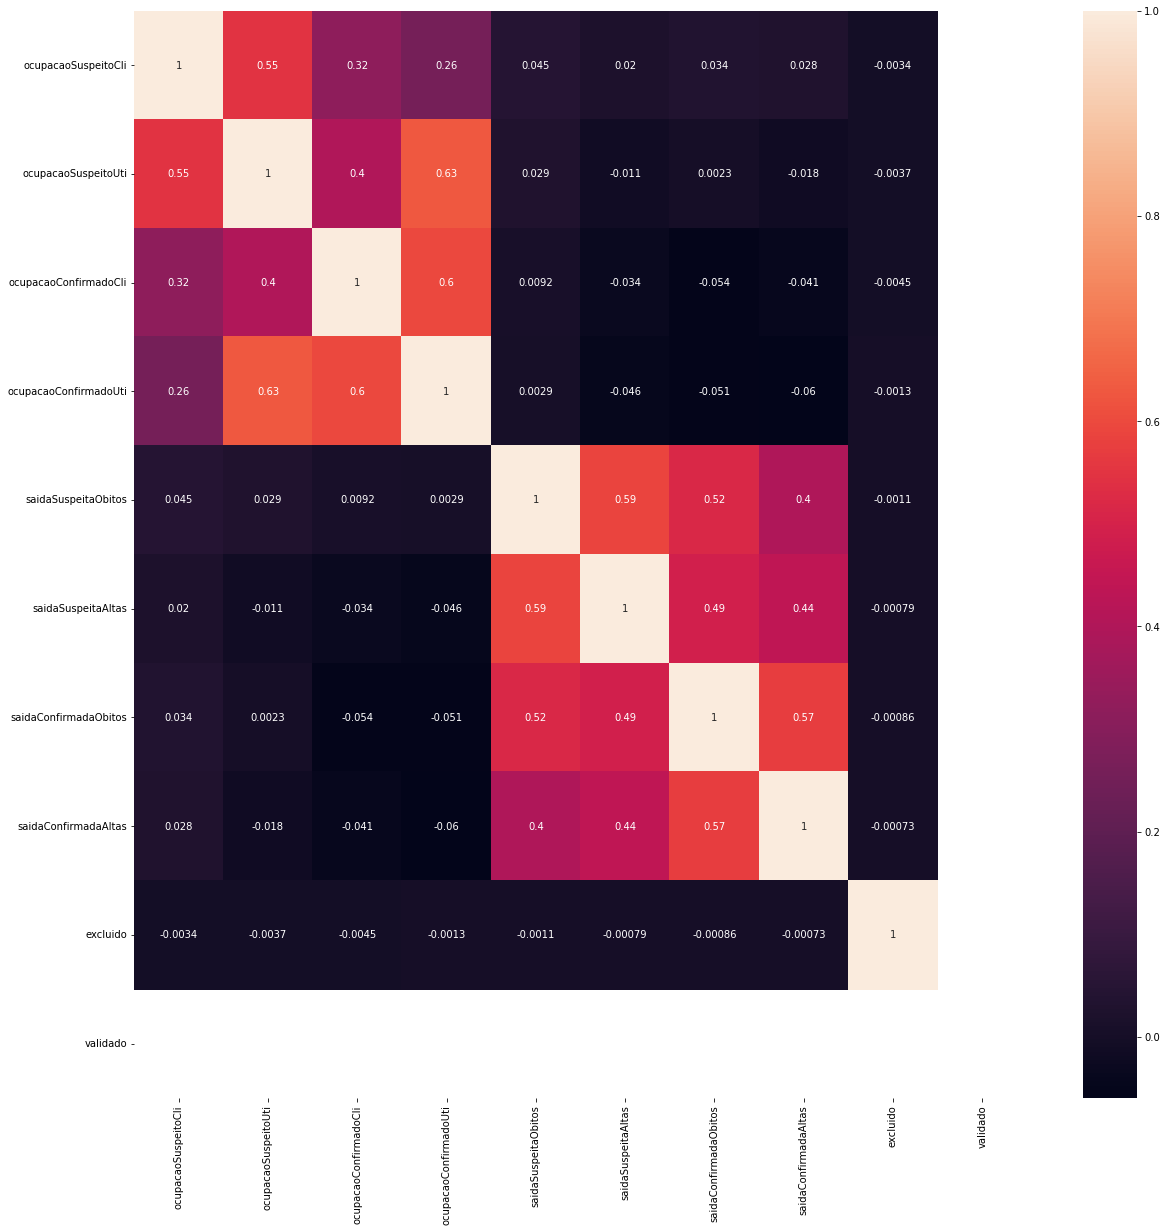

In [ ]:
##Indica a correlação entre todos os atributos
###quanto maior o indice mais forte é a correlação.
##Para conseguir algum insigth
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df_filtrado.corr(), annot = True);

In [ ]:
X_numerical = df[['ocupacaoConfirmadoUti', 'ocupacaoConfirmadoCli', 'ocupacaoSuspeitoUti','ocupacaoSuspeitoCli']]

NameError: ignored

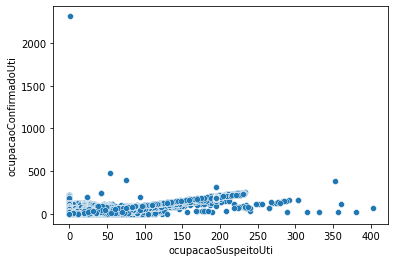

In [ ]:
##relação entre ocupação confirmado UTI e ocupação suspeito UTI
sns.scatterplot(x = 'ocupacaoSuspeitoUti', y = 'ocupacaoConfirmadoUti', data = df_filtrado);